In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost.sklearn import XGBRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [40]:
df = pd.read_csv('ASAP Dataset/Preprocessed_df.csv')

In [41]:
df.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,avg_sentence_length,pos_ratios,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,unigrams,bigrams,trigrams,preprocessed_text
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,1.0,"{'NNP': 0.031088082901554404, 'JJ': 0.05181347...",16,1,0.310471,0.385613,<FreqDist with 181 samples and 386 outcomes>,<FreqDist with 329 samples and 385 outcomes>,<FreqDist with 356 samples and 384 outcomes>,dear local newspaper think effect computer peo...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,1.0,"{'NNP': 0.03879310344827586, ',': 0.0258620689...",20,1,0.274000,0.613167,<FreqDist with 209 samples and 464 outcomes>,<FreqDist with 412 samples and 463 outcomes>,<FreqDist with 447 samples and 462 outcomes>,dear local newspaper think effect computer peo...
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,1.0,"{'NNP': 0.04153354632587859, ',': 0.0287539936...",14,1,0.340393,0.498657,<FreqDist with 161 samples and 313 outcomes>,<FreqDist with 289 samples and 312 outcomes>,<FreqDist with 306 samples and 311 outcomes>,dear local newspaper think effect computer peo...
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,1.0,"{'NNP': 0.11620294599018004, ',': 0.0212765957...",27,1,0.266828,0.441795,<FreqDist with 267 samples and 611 outcomes>,<FreqDist with 518 samples and 610 outcomes>,<FreqDist with 578 samples and 609 outcomes>,dear local newspaper think effect computer peo...
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,1.0,"{'NNP': 0.017408123791102514, ',': 0.025145067...",30,1,0.199684,0.485814,<FreqDist with 211 samples and 517 outcomes>,<FreqDist with 443 samples and 516 outcomes>,<FreqDist with 498 samples and 515 outcomes>,dear local newspaper think effect computer peo...


In [42]:
drop_columns = ['essay_id', 'rater1_domain1', 'rater2_domain1',
               'rater3_domain1', 'rater1_domain2', 'rater2_domain2', 'domain2_score',
               'rater1_trait1', 'rater1_trait2', 'rater1_trait3', 'rater2_trait1',
               'rater2_trait2', 'rater1_trait4', 'rater1_trait5', 'rater1_trait6', 'rater2_trait3',
               'rater2_trait4', 'rater2_trait5', 'rater2_trait6',
               'rater3_trait1', 'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
                'essay', 'rater3_trait6', 'avg_sentence_length', 'pos_ratios',
               'unigrams', 'bigrams', 'trigrams'
               ]
df.drop(drop_columns, axis = 1, inplace = True)

In [43]:
df.head()

,essay_set,domain1_score,essay_len,word_len,chars_len,avg_word_length,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,8,338,386,1875,3.984456,16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,1,9,419,464,2288,4.030172,20,1,0.274000,0.613167,dear local newspaper think effect computer peo...
2,1,7,279,313,1541,4.035144,14,1,0.340393,0.498657,dear local newspaper think effect computer peo...
3,1,10,524,611,3165,4.328969,27,1,0.266828,0.441795,dear local newspaper think effect computer peo...
4,1,8,465,517,2569,4.071567,30,1,0.199684,0.485814,dear local newspaper think effect computer peo...


In [44]:
def choose_regressors(regressor_name = "linear_regression"):
    """
    Takes a regressor as input and returns a corresponding regressor object
    """
    
    if regressor_name == 'linear_regression':
        return LinearRegression()
    elif regressor_name == 'lasso':
        return Lasso()
    elif regressor_name == 'ridge':
        return Ridge()
    elif regressor_name == 'elastic_net':
        return ElasticNet()
    elif regressor_name == 'decision_tree_regression':
        return DecisionTreeRegressor()
    elif regressor_name == 'random_forest_regression':
        return RandomForestRegressor()
    elif regressor_name == 'gradient_boosting_regression':
        return GradientBoostingRegressor()
    elif regressor_name == 'adaboost_regression':
        return AdaBoostRegressor()
    elif regressor_name == 'k_neighbors_regression':
        return KNeighborsRegressor()
    elif regressor_name == 'support_vector_regression':
        return SVR()
    elif regressor_name == 'xgboost_regression':
        return XGBRegressor()
    elif regressor_name == 'gaussian_naive_bayes_regression':
        return GaussianNB()
    else:
        raise ValueError(f"Regressor {regressor_name} not supported for regression problems.")

In [45]:
def extract_bow(corpus, only_fit = True):
    """
    Takes a list of text documents as input and returns the BoW representation as a sparse matrix
    """
    vectorizer = CountVectorizer()
    if only_fit:
        vectorizer.fit(corpus)
        return vectorizer
    else:
        bow_representation = vectorizer.fit_transform(corpus)
        return vectorizer, bow_representation

In [46]:
def calc_mse(y_true, y_pred):
    """
    Calculates the mean squared error (MSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

def calc_mse(y_true, y_pred):
    """
    Calculates the mean squared error (MSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    return mse

def calc_mae(y_true, y_pred):
    """
    Calculates the mean absolute error (MAE) between the true and predicted values
    """
    mae = mean_absolute_error(y_true, y_pred)
    return mae

def calc_rmse(y_true, y_pred):
    """
    Calculates the root mean squared error (RMSE) between the true and predicted values
    """
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

def calc_mape(y_true, y_pred):
    """
    Calculates the mean absolute percentage error (MAPE) between the true and predicted values
    """
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

def calc_r2_score(y_true, y_pred):
    """
    Calculates the R2 score between the true and predicted values
    """
    r2 = r2_score(y_true, y_pred)
    return r2

In [47]:
# Calculate and print MSE
def print_metrics_function(y_actual, y_predictions):
    
    # Calculate and print MSE
    mse = calc_mse(y_actual, y_predictions)
    print("MSE:", mse)

    # Calculate and print RMSE
    rmse = calc_rmse(y_actual, y_predictions)
    print("RMSE:", rmse)
    
    # Calculate and print MAE
    mae = calc_mae(y_actual, y_predictions)
    print("MAE:", mae)

    # Calculate and print MAPE
    mape = calc_mape(y_actual, y_predictions)
    print("MAPE:", mape)

    # Calculate and print R2 score
    r2 = calc_r2_score(y_actual, y_predictions)
    print("R2 Score:", r2)
    
    return mse, rmse, mae, mape, r2

In [48]:
df.head()

,essay_set,domain1_score,essay_len,word_len,chars_len,avg_word_length,num_sentences,num_paragraphs,sentiment_polariy,sentiment_subjectivity,preprocessed_text
0,1,8,338,386,1875,3.984456,16,1,0.310471,0.385613,dear local newspaper think effect computer peo...
1,1,9,419,464,2288,4.030172,20,1,0.274000,0.613167,dear local newspaper think effect computer peo...
2,1,7,279,313,1541,4.035144,14,1,0.340393,0.498657,dear local newspaper think effect computer peo...
3,1,10,524,611,3165,4.328969,27,1,0.266828,0.441795,dear local newspaper think effect computer peo...
4,1,8,465,517,2569,4.071567,30,1,0.199684,0.485814,dear local newspaper think effect computer peo...


In [49]:
df_essay_set1 = df[df.essay_set == 1]
df_essay_set2 = df[df.essay_set == 2]
df_essay_set3 = df[df.essay_set == 3]
df_essay_set4 = df[df.essay_set == 4]
df_essay_set5 = df[df.essay_set == 5]
df_essay_set6 = df[df.essay_set == 6]
df_essay_set7 = df[df.essay_set == 7]
df_essay_set8 = df[df.essay_set == 8]

In [50]:
def dataset_preparation(data, target = 'domain1_score'):
    
    X = data.drop([target], axis = 1)
    y = data[target]
    
    return X, y

In [51]:
X_set1, y_set1 = dataset_preparation(df_essay_set1)
X_set2, y_set2 = dataset_preparation(df_essay_set2)
X_set3, y_set3 = dataset_preparation(df_essay_set3)
X_set4, y_set4 = dataset_preparation(df_essay_set4)
X_set5, y_set5 = dataset_preparation(df_essay_set5)
X_set6, y_set6 = dataset_preparation(df_essay_set6)
X_set7, y_set7 = dataset_preparation(df_essay_set7)
X_set8, y_set8 = dataset_preparation(df_essay_set8)

In [53]:
X_train_set1, X_test_set1, y_train_set1, y_test_set1 = train_test_split(X_set1, y_set1, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set2, X_test_set2, y_train_set2, y_test_set2 = train_test_split(X_set2, y_set2, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set3, X_test_set3, y_train_set3, y_test_set3 = train_test_split(X_set3, y_set3, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set4, X_test_set4, y_train_set4, y_test_set4 = train_test_split(X_set4, y_set4, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set5, X_test_set5, y_train_set5, y_test_set5 = train_test_split(X_set5, y_set5, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set6, X_test_set6, y_train_set6, y_test_set6 = train_test_split(X_set6, y_set6, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set7, X_test_set7, y_train_set7, y_test_set7 = train_test_split(X_set7, y_set7, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)

X_train_set8, X_test_set8, y_train_set8, y_test_set8 = train_test_split(X_set8, y_set8, shuffle = True, 
                                                                       random_state = 101, test_size = 0.2)


In [62]:
def print_shapes(X_train, X_test, y_train, y_test, 
                 set_value = "Essay Set-1"):
    
    print(f"------------------------{set_value}------------------------")
    print("The shape of input train data: {}".format(X_train.shape))
    print("The shape of input test data: {}".format(X_test.shape))
    print("The shape of output train data: {}".format(y_train.shape))
    print("The shape of output test data: {}".format(y_test.shape))
    print("\n")

In [65]:
print_shapes(X_train_set1, X_test_set1, y_train_set1, y_test_set1)
print_shapes(X_train_set2, X_test_set2, y_train_set2, y_test_set2, set_value = "Essay Set-2")
print_shapes(X_train_set3, X_test_set3, y_train_set3, y_test_set3, set_value = "Essay Set-3")
print_shapes(X_train_set4, X_test_set4, y_train_set4, y_test_set4, set_value = "Essay Set-4")
print_shapes(X_train_set5, X_test_set5, y_train_set5, y_test_set5, set_value = "Essay Set-5")
print_shapes(X_train_set6, X_test_set6, y_train_set6, y_test_set6, set_value = "Essay Set-6")
print_shapes(X_train_set7, X_test_set7, y_train_set7, y_test_set7, set_value = "Essay Set-7")
print_shapes(X_train_set8, X_test_set8, y_train_set8, y_test_set8, set_value = "Essay Set-8")

------------------------Essay Set-1------------------------
The shape of input train data: (1426, 10)
The shape of input test data: (357, 10)
The shape of output train data: (1426,)
The shape of output test data: (357,)


------------------------Essay Set-2------------------------
The shape of input train data: (1440, 10)
The shape of input test data: (360, 10)
The shape of output train data: (1440,)
The shape of output test data: (360,)


------------------------Essay Set-3------------------------
The shape of input train data: (1380, 10)
The shape of input test data: (346, 10)
The shape of output train data: (1380,)
The shape of output test data: (346,)


------------------------Essay Set-4------------------------
The shape of input train data: (1416, 10)
The shape of input test data: (354, 10)
The shape of output train data: (1416,)
The shape of output test data: (354,)


------------------------Essay Set-5------------------------
The shape of input train data: (1444, 10)
The shape 

In [67]:
X_train_set1['preprocessed_text'].iloc[0]

'dear local newspaper think effect computer people great learning skillsaffects give u time chat friendsnew people help u learn globe astronomy keep u troble thing dont think would feel teenager always phone friend ever time chat friend buisness partner thing well s new way chat computer plenty site internet facebook myspace ect think setting meeting bos computer teenager fun phone rushing get cause want use learn countrysstates outside well computerinternet s new way learn going time might think child spends lot time computer ask question economy sea floor spreading even ll surprise much heshe know believe computer much interesting class day reading book child home computer local library s better friend fresh perpressured something know isnt right might know child forbidde hospital bed driveby rather child computer learning chatting playing game safe sound home community place hope reached point understand agree computer great effect child give u time chat friendsnew people help u lea

### Bag-of-Words Vectorizer

In [68]:
X_train_corpus = X_train_set1['preprocessed_text']
X_test_corpus = X_test_set1['preprocessed_text']

In [70]:
bow_vectorizer, X_train_bow = extract_bow(X_train_corpus, only_fit = False)
X_test_bow = bow_vectorizer.transform(X_test_corpus)

In [71]:
from sklearn.metrics import cohen_kappa_score

In [72]:
print("-----------------------Linear Regression-----------------------")
model = choose_regressors("linear_regression")
model.fit(X_train_bow, y_train_set1)
y_predictions = model.predict(X_test_bow)

-----------------------Linear Regression-----------------------


In [79]:
y_test_set1

1230     8
1152    10
692      9
1063     9
383     10
        ..
829      2
1033     9
1491     6
1290     4
196     10
Name: domain1_score, Length: 357, dtype: int64

In [75]:
X_train_bow

<1426x102 sparse matrix of type '<class 'numpy.int64'>'
	with 145452 stored elements in Compressed Sparse Row format>

In [76]:
print("-----------------------Xgboost Regression-----------------------")
model = choose_regressors("xgboost_regression")
model.fit(X_train_bow, y_train_set1)
y_predictions = model.predict(X_test_bow)

-----------------------Xgboost Regression-----------------------


In [77]:
cohen_kappa_score(y_predictions, y_test_set1)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

### Models with Metrics (Cohesion)

In [141]:
print("-----------------------Linear Regression-----------------------")
model = choose_regressors("linear_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_linear_reg, rmse_linear_reg, mae_linear_reg, mape_linear_reg, r2_linear_reg = print_metrics_function(y_test_, y_predictions)

print("\n")
print("-----------------------Lasso Regression-----------------------")
model = choose_regressors("lasso")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_lasso, rmse_lasso, mae_lasso, mape_lasso, r2_lasso = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Ridge Regression-----------------------")
model = choose_regressors("ridge")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_ridge, rmse_ridge, mae_ridge, mape_ridge, r2_ridge = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Elastic Net-----------------------")
model = choose_regressors("elastic_net")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_elastic_net, rmse_elastic_net, mae_elastic_net, mape_elastic_net, r2_elastic_net = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Decision Tree Regression-----------------------")
model = choose_regressors("decision_tree_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_decision_tree, rmse_decision_tree, mae_decision_tree, mape_decision_tree, r2_decision_tree = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Random Forest Regression-----------------------")
model = choose_regressors("random_forest_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_random_forest, rmse_random_forest, mae_random_forest, mape_random_forest, r2_random_forest = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Gradient Boosting Regression-----------------------")
model = choose_regressors("gradient_boosting_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_gradient_boosting, rmse_gradient_boosting, mae_gradient_boosting, mape_gradient_boosting, r2_gradient_boosting = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Adaboost Regression-----------------------")
model = choose_regressors("adaboost_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_adaboost, rmse_adaboost, mae_adaboost, mape_adaboost, r2_adaboost = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------K Neighbors Regression-----------------------")
model = choose_regressors("k_neighbors_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_k_neighbors, rmse_k_neighbors, mae_k_neighbors, mape_k_neighbors, r2_k_neighbors = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Support Vector Regression-----------------------")
model = choose_regressors("support_vector_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_svr, rmse_svr, mae_svr, mape_svr, r2_svr = print_metrics_function(y_test_cohesion, y_predictions)

print("\n")
print("-----------------------Xgboost Regression-----------------------")
model = choose_regressors("xgboost_regression")
model.fit(X_train_bow, y_train_cohesion)
y_predictions = model.predict(X_test_bow)

mse_xgboost, rmse_xgboost, mae_xgboost, mape_xgboost, r2_xgboost = print_metrics_function(y_test_cohesion, y_predictions)

-----------------------Linear Regression-----------------------
MSE: 2.0745833645395626
RMSE: 1.4403414055492407
MAE: 1.0719633812525378
MAPE: 35.13028359246971
R2 Score: -3.7255632105864898


-----------------------Lasso Regression-----------------------
MSE: 0.43681169710650053
RMSE: 0.6609173148787226
MAE: 0.5354061017606635
MAPE: 18.09968243611829
R2 Score: 0.005014056758111396


-----------------------Ridge Regression-----------------------
MSE: 1.006517121591656
RMSE: 1.0032532689165063
MAE: 0.7769694932143353
MAPE: 25.718056329965165
R2 Score: -1.292682165449916


-----------------------Elastic Net-----------------------
MSE: 0.42709132105093783
RMSE: 0.6535222422006292
MAE: 0.5275566922629452
MAPE: 17.85305382038154
R2 Score: 0.027155491161942935


-----------------------Decision Tree Regression-----------------------
MSE: 0.6832694763729247
RMSE: 0.8266011591891973
MAE: 0.6385696040868455
MAPE: 21.175981674065966
R2 Score: -0.5563766468267237


-----------------------Random Fo

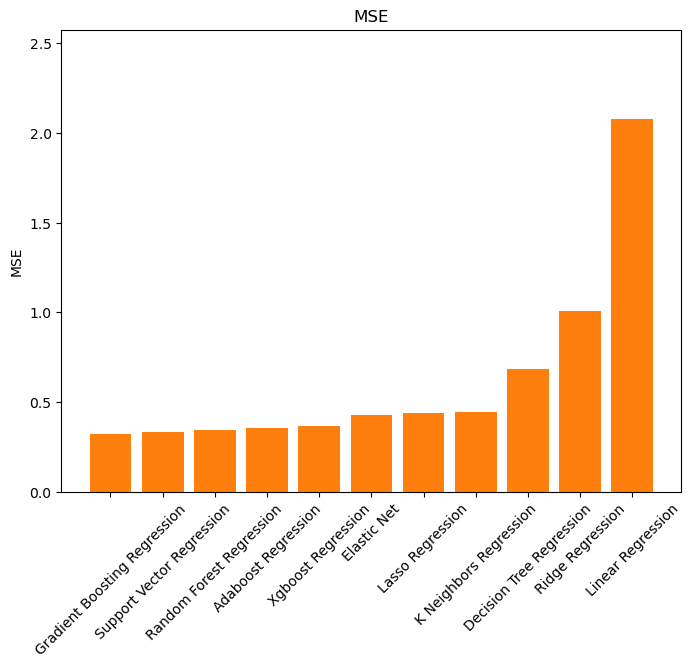

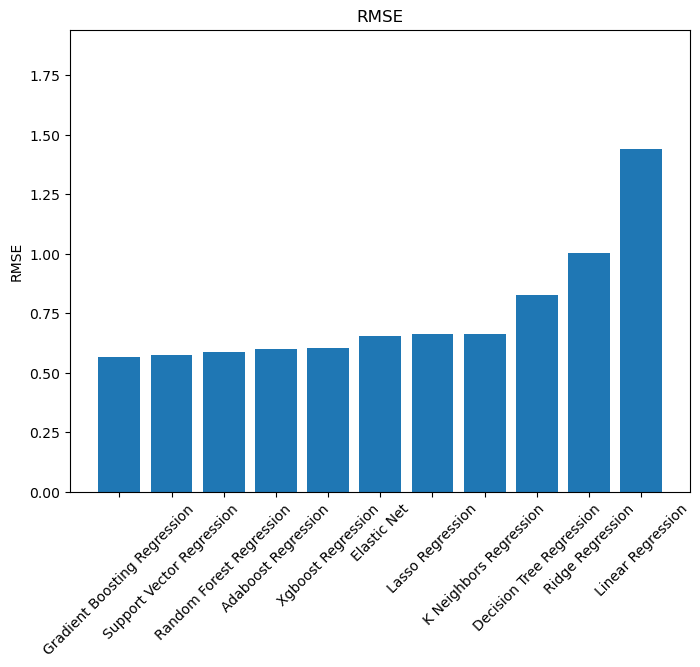

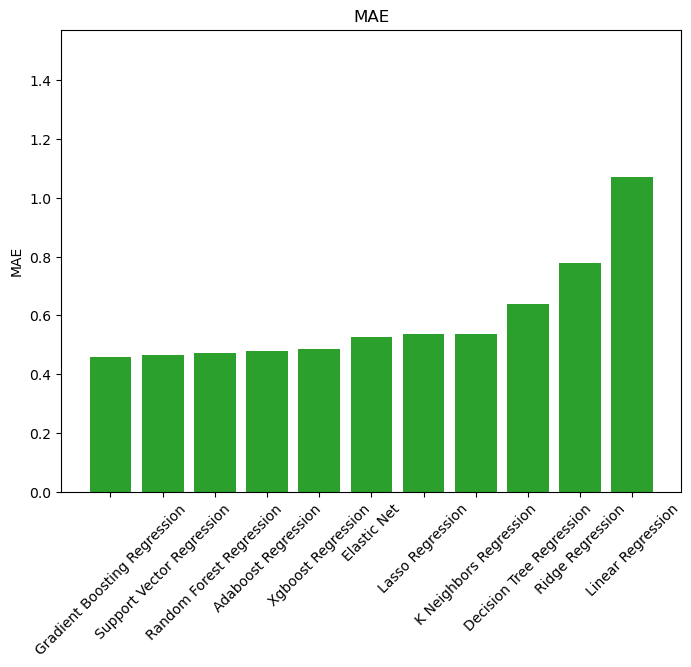

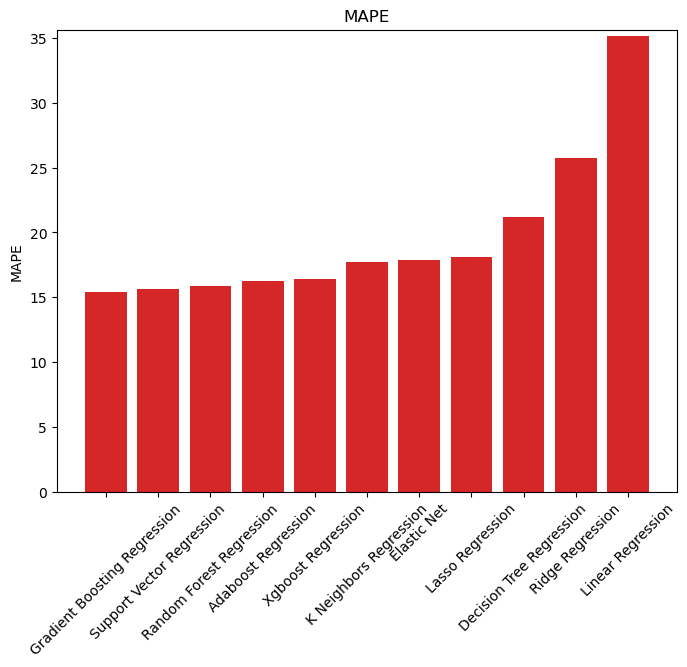

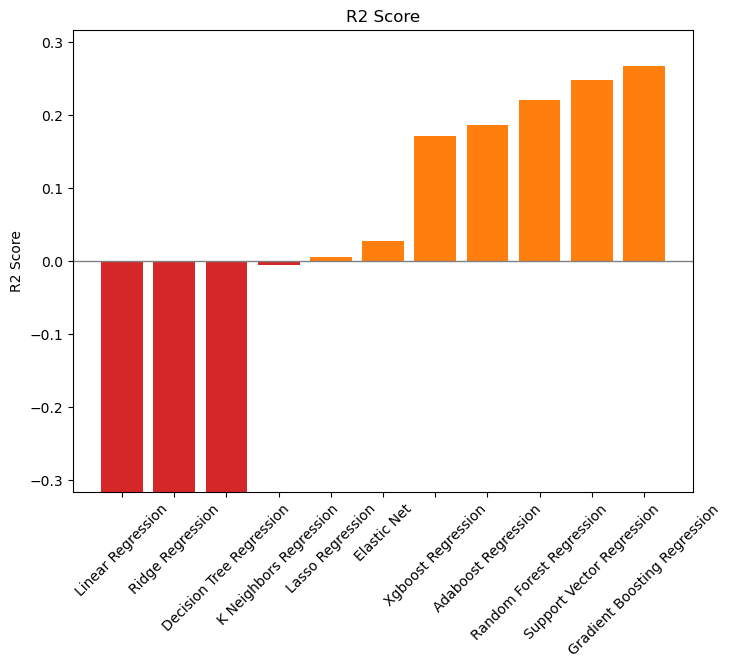

In [142]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x axis labels
labels = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]

# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Plot each model for a single metric
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding model names
    values = metrics_list[i]
    sorted_indices = np.argsort(values)
    sorted_values = [values[j] for j in sorted_indices]
    sorted_labels = [labels[j] for j in sorted_indices]
    
    if metric_name == "R2 Score":
        # Define the colors for positive and negative bars
        pos_color = colors[0]
        neg_color = colors[3]
        
        # Split the sorted values into positive and negative lists
        pos_values = [val if val > 0 else 0 for val in sorted_values]
        neg_values = [val if val < 0 else 0 for val in sorted_values]
        
        # Create the figure and axes for the diverging bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        
        # Plot the positive bars first
        ax.bar(sorted_labels, pos_values, color=pos_color)
        
        # Plot the negative bars on top of the positive bars
        ax.bar(sorted_labels, neg_values, color=neg_color)
        
        # Set the y limits based on the maximum absolute value of the metric
        y_limit = max(sorted_values) + 0.05
        ax.set_ylim([-y_limit, y_limit])

        # Set the title, labels, and ticks for the plot
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.axhline(y=0, color='gray', linewidth=1) # Add a horizontal line at y=0
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    else:
        # For the other metrics, create a regular bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        ax.bar(sorted_labels, sorted_values, color=colors[i])
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.set_ylim([0, max(sorted_values)+0.5])
        plt.xticks(rotation=45)
        plt.show()

In [143]:
# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Define the ML model names
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the green color format for highlighting the lowest value
lowest_value_format = '\033[32m{:.3f}\033[0m'

# Define the red color format for highlighting the highest value
highest_value_format = '\033[31m{:.3f}\033[0m'

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]
        
        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        
        # Highlight the lowest and highest value
        if j != 4:
            if value == min(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
        else:
            if value == min(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
                
        row.append(value_formatted)
        
    table.add_row(row)

# Print the formatted table
print(table.get_string())


+------------------------------+-------+-------+-------+--------+----------+
|            Model             |  MSE  |  RMSE |  MAE  |  MAPE  | R2 Score |
+------------------------------+-------+-------+-------+--------+----------+
|      Linear Regression       | 2.075 | 1.440 | 1.072 | 35.130 |  -3.726  |
|       Lasso Regression       | 0.437 | 0.661 | 0.535 | 18.100 |  0.005   |
|       Ridge Regression       | 1.007 | 1.003 | 0.777 | 25.718 |  -1.293  |
|         Elastic Net          | 0.427 | 0.654 | 0.528 | 17.853 |  0.027   |
|   Decision Tree Regression   | 0.683 | 0.827 | 0.639 | 21.176 |  -0.556  |
|   Random Forest Regression   | 0.343 | 0.585 | 0.471 | 15.862 |  0.220   |
| Gradient Boosting Regression | 0.322 | 0.568 | 0.457 | 15.417 |  0.266   |
|     Adaboost Regression      | 0.357 | 0.598 | 0.479 | 16.259 |  0.186   |
|    K Neighbors Regression    | 0.442 | 0.664 | 0.536 | 17.723 |  -0.006  |
|  Support Vector Regression   | 0.330 | 0.575 | 0.466 | 15.620 |  0.247   |

### Models with Metrics (Syntax)

In [144]:
print("-----------------------Linear Regression-----------------------")
model = choose_regressors("linear_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_linear_reg, rmse_linear_reg, mae_linear_reg, mape_linear_reg, r2_linear_reg = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Lasso Regression-----------------------")
model = choose_regressors("lasso")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_lasso, rmse_lasso, mae_lasso, mape_lasso, r2_lasso = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Ridge Regression-----------------------")
model = choose_regressors("ridge")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_ridge, rmse_ridge, mae_ridge, mape_ridge, r2_ridge = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Elastic Net-----------------------")
model = choose_regressors("elastic_net")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_elastic_net, rmse_elastic_net, mae_elastic_net, mape_elastic_net, r2_elastic_net = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Decision Tree Regression-----------------------")
model = choose_regressors("decision_tree_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_decision_tree, rmse_decision_tree, mae_decision_tree, mape_decision_tree, r2_decision_tree = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Random Forest Regression-----------------------")
model = choose_regressors("random_forest_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_random_forest, rmse_random_forest, mae_random_forest, mape_random_forest, r2_random_forest = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Gradient Boosting Regression-----------------------")
model = choose_regressors("gradient_boosting_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_gradient_boosting, rmse_gradient_boosting, mae_gradient_boosting, mape_gradient_boosting, r2_gradient_boosting = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Adaboost Regression-----------------------")
model = choose_regressors("adaboost_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_adaboost, rmse_adaboost, mae_adaboost, mape_adaboost, r2_adaboost = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------K Neighbors Regression-----------------------")
model = choose_regressors("k_neighbors_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_k_neighbors, rmse_k_neighbors, mae_k_neighbors, mape_k_neighbors, r2_k_neighbors = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Support Vector Regression-----------------------")
model = choose_regressors("support_vector_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_svr, rmse_svr, mae_svr, mape_svr, r2_svr = print_metrics_function(y_test_syntax, y_predictions)

print("\n")
print("-----------------------Xgboost Regression-----------------------")
model = choose_regressors("xgboost_regression")
model.fit(X_train_bow, y_train_syntax)
y_predictions = model.predict(X_test_bow)

mse_xgboost, rmse_xgboost, mae_xgboost, mape_xgboost, r2_xgboost = print_metrics_function(y_test_syntax, y_predictions)

-----------------------Linear Regression-----------------------
MSE: 1.7672340184116397
RMSE: 1.3293735435954936
MAE: 0.9941492463423628
MAPE: 33.767269286674995
R2 Score: -3.0312827408004495


-----------------------Lasso Regression-----------------------
MSE: 0.43816018858445793
RMSE: 0.6619366952998285
MAE: 0.5067204977369424
MAPE: 17.98135105596827
R2 Score: 0.000501581825615105


-----------------------Ridge Regression-----------------------
MSE: 0.9380459786764045
RMSE: 0.9685277376907718
MAE: 0.7395747869322907
MAPE: 25.291853440989815
R2 Score: -1.1398006854317067


-----------------------Elastic Net-----------------------
MSE: 0.4316419804267185
RMSE: 0.6569946578372753
MAE: 0.5046311919232837
MAPE: 17.91922625474377
R2 Score: 0.015370433247373527


-----------------------Decision Tree Regression-----------------------
MSE: 0.6376117496807152
RMSE: 0.7985059484316415
MAE: 0.6162196679438059
MAPE: 21.56728293701474
R2 Score: -0.4544724779175937


-----------------------Random F

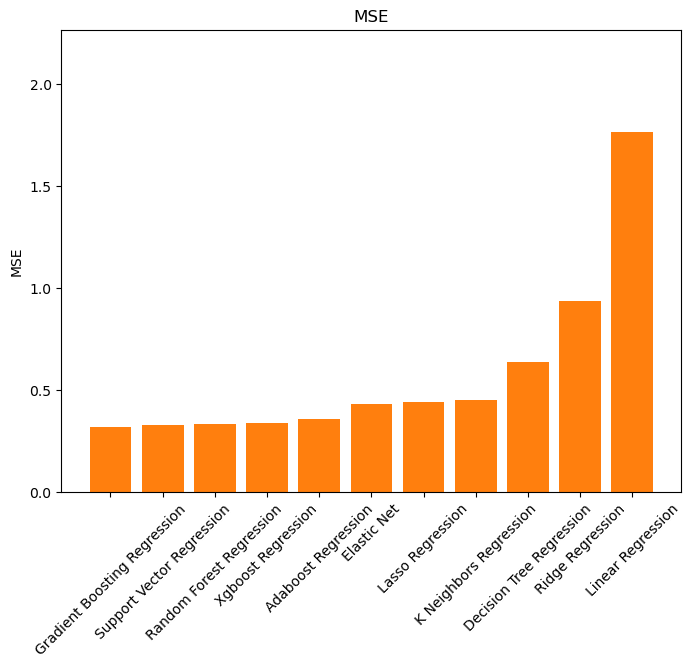

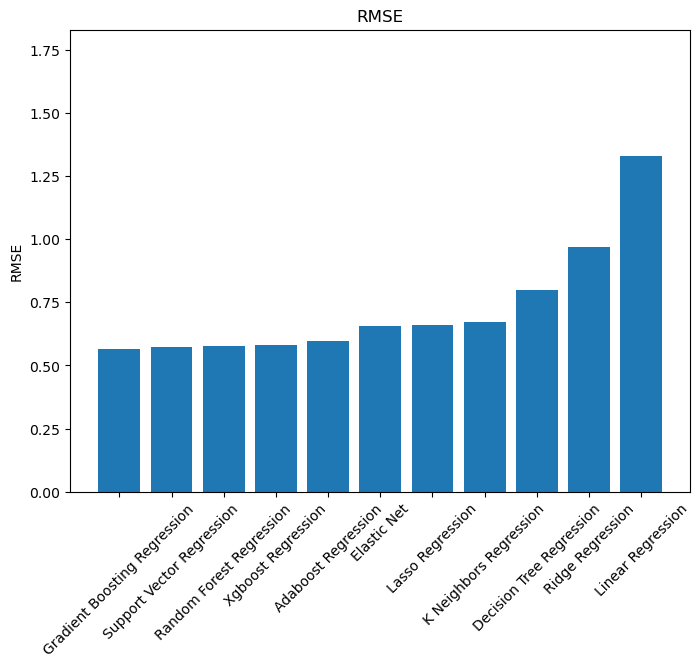

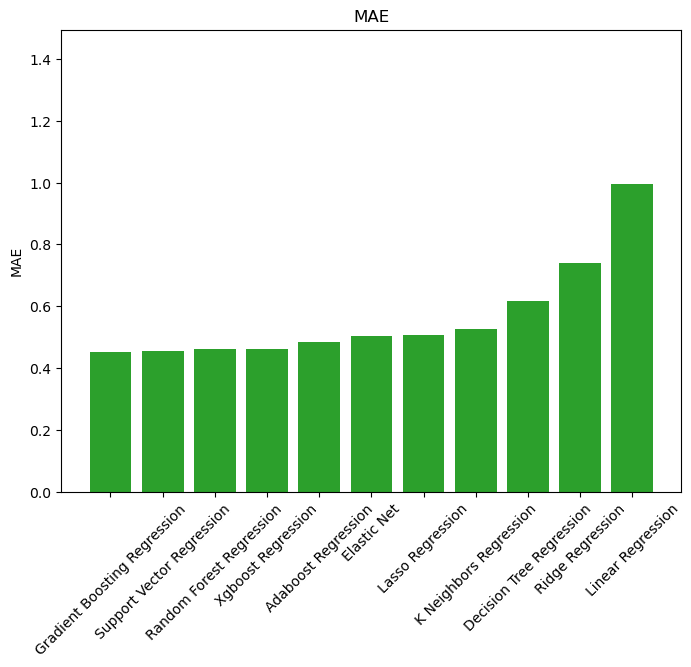

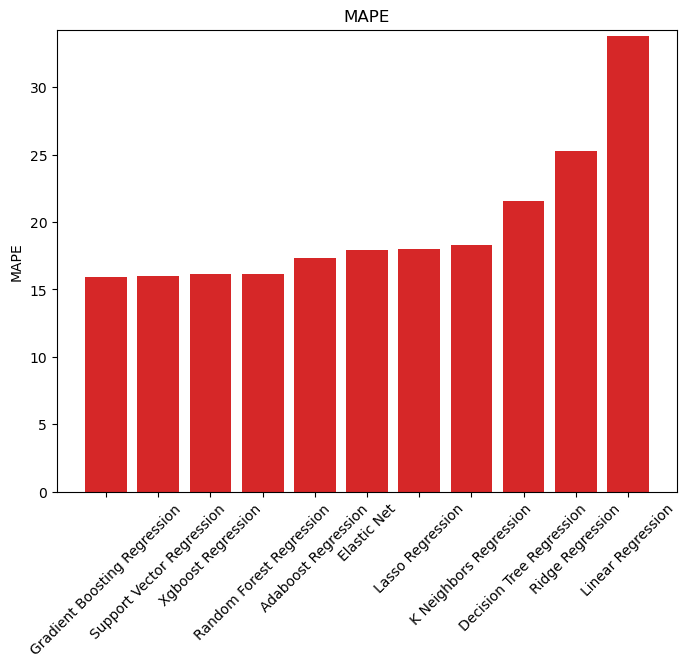

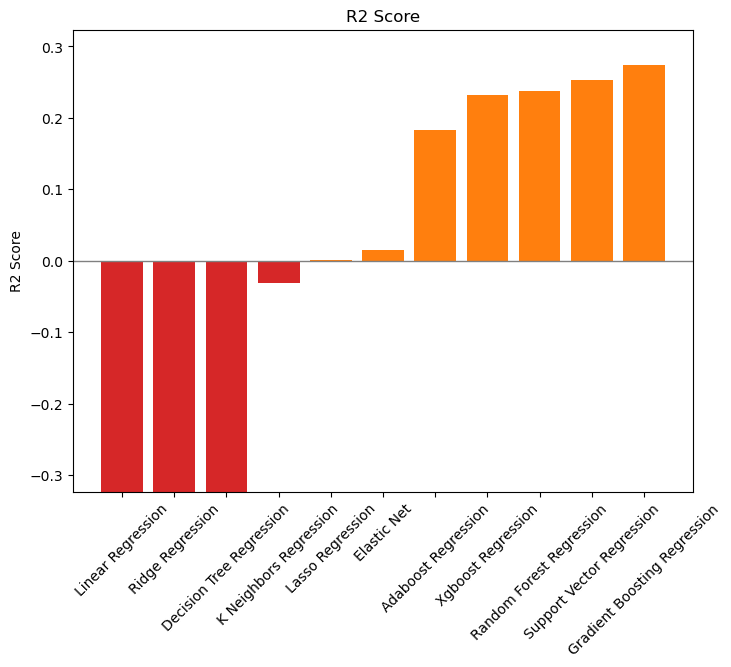

In [145]:
# Define the x axis labels
labels = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]

# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Plot each model for a single metric
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding model names
    values = metrics_list[i]
    sorted_indices = np.argsort(values)
    sorted_values = [values[j] for j in sorted_indices]
    sorted_labels = [labels[j] for j in sorted_indices]
    
    if metric_name == "R2 Score":
        # Define the colors for positive and negative bars
        pos_color = colors[0]
        neg_color = colors[3]
        
        # Split the sorted values into positive and negative lists
        pos_values = [val if val > 0 else 0 for val in sorted_values]
        neg_values = [val if val < 0 else 0 for val in sorted_values]
        
        # Create the figure and axes for the diverging bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        
        # Plot the positive bars first
        ax.bar(sorted_labels, pos_values, color=pos_color)
        
        # Plot the negative bars on top of the positive bars
        ax.bar(sorted_labels, neg_values, color=neg_color)
        
        # Set the y limits based on the maximum absolute value of the metric
        y_limit = max(sorted_values) + 0.05
        ax.set_ylim([-y_limit, y_limit])

        # Set the title, labels, and ticks for the plot
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.axhline(y=0, color='gray', linewidth=1) # Add a horizontal line at y=0
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    else:
        # For the other metrics, create a regular bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        ax.bar(sorted_labels, sorted_values, color=colors[i])
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.set_ylim([0, max(sorted_values)+0.5])
        plt.xticks(rotation=45)
        plt.show()

In [146]:
# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Define the ML model names
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the green color format for highlighting the lowest value
lowest_value_format = '\033[32m{:.3f}\033[0m'

# Define the red color format for highlighting the highest value
highest_value_format = '\033[31m{:.3f}\033[0m'

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]
        
        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        
        # Highlight the lowest and highest value
        if j != 4:
            if value == min(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
        else:
            if value == min(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
                
        row.append(value_formatted)
        
    table.add_row(row)

# Print the formatted table
print(table.get_string())

+------------------------------+-------+-------+-------+--------+----------+
|            Model             |  MSE  |  RMSE |  MAE  |  MAPE  | R2 Score |
+------------------------------+-------+-------+-------+--------+----------+
|      Linear Regression       | 1.767 | 1.329 | 0.994 | 33.767 |  -3.031  |
|       Lasso Regression       | 0.438 | 0.662 | 0.507 | 17.981 |  0.001   |
|       Ridge Regression       | 0.938 | 0.969 | 0.740 | 25.292 |  -1.140  |
|         Elastic Net          | 0.432 | 0.657 | 0.505 | 17.919 |  0.015   |
|   Decision Tree Regression   | 0.638 | 0.799 | 0.616 | 21.567 |  -0.454  |
|   Random Forest Regression   | 0.334 | 0.578 | 0.461 | 16.183 |  0.238   |
| Gradient Boosting Regression | 0.319 | 0.564 | 0.453 | 15.948 |  0.273   |
|     Adaboost Regression      | 0.358 | 0.598 | 0.484 | 17.309 |  0.183   |
|    K Neighbors Regression    | 0.452 | 0.672 | 0.528 | 18.324 |  -0.031  |
|  Support Vector Regression   | 0.327 | 0.572 | 0.456 | 15.972 |  0.254   |

### Models with Metrics (Vocabulary)

In [147]:
print("-----------------------Linear Regression-----------------------")
model = choose_regressors("linear_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_linear_reg, rmse_linear_reg, mae_linear_reg, mape_linear_reg, r2_linear_reg = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Lasso Regression-----------------------")
model = choose_regressors("lasso")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_lasso, rmse_lasso, mae_lasso, mape_lasso, r2_lasso = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Ridge Regression-----------------------")
model = choose_regressors("ridge")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_ridge, rmse_ridge, mae_ridge, mape_ridge, r2_ridge = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Elastic Net-----------------------")
model = choose_regressors("elastic_net")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_elastic_net, rmse_elastic_net, mae_elastic_net, mape_elastic_net, r2_elastic_net = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Decision Tree Regression-----------------------")
model = choose_regressors("decision_tree_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_decision_tree, rmse_decision_tree, mae_decision_tree, mape_decision_tree, r2_decision_tree = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Random Forest Regression-----------------------")
model = choose_regressors("random_forest_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_random_forest, rmse_random_forest, mae_random_forest, mape_random_forest, r2_random_forest = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Gradient Boosting Regression-----------------------")
model = choose_regressors("gradient_boosting_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_gradient_boosting, rmse_gradient_boosting, mae_gradient_boosting, mape_gradient_boosting, r2_gradient_boosting = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Adaboost Regression-----------------------")
model = choose_regressors("adaboost_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_adaboost, rmse_adaboost, mae_adaboost, mape_adaboost, r2_adaboost = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------K Neighbors Regression-----------------------")
model = choose_regressors("k_neighbors_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_k_neighbors, rmse_k_neighbors, mae_k_neighbors, mape_k_neighbors, r2_k_neighbors = print_metrics_function(y_test_vocabulary, y_predictions)

print("-----------------------Support Vector Regression-----------------------")
model = choose_regressors("support_vector_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_svr, rmse_svr, mae_svr, mape_svr, r2_svr = print_metrics_function(y_test_vocabulary, y_predictions)

print("\n")
print("-----------------------Xgboost Regression-----------------------")
model = choose_regressors("xgboost_regression")
model.fit(X_train_bow, y_train_vocabulary)
y_predictions = model.predict(X_test_bow)

mse_xgboost, rmse_xgboost, mae_xgboost, mape_xgboost, r2_xgboost = print_metrics_function(y_test_vocabulary, y_predictions)


-----------------------Linear Regression-----------------------
MSE: 1.3429455940063182
RMSE: 1.1588552946793307
MAE: 0.8738584918675301
MAPE: 27.234869467893436
R2 Score: -2.7800465594820323


-----------------------Lasso Regression-----------------------
MSE: 0.3514778755219735
RMSE: 0.5928556953609989
MAE: 0.4826227132649667
MAPE: 15.254547324263704
R2 Score: 0.010680149642280146


-----------------------Ridge Regression-----------------------
MSE: 0.7305395316510871
RMSE: 0.854716053231181
MAE: 0.6448665522920795
MAPE: 20.221903083124843
R2 Score: -1.0562809509990578


-----------------------Elastic Net-----------------------
MSE: 0.3418716980625878
RMSE: 0.5846979545565282
MAE: 0.47373524267599704
MAPE: 14.990372728896922
R2 Score: 0.03771906932539115


-----------------------Decision Tree Regression-----------------------
MSE: 0.5044699872286079
RMSE: 0.7102605065950154
MAE: 0.5351213282247765
MAPE: 16.98493786616392
R2 Score: -0.419953308679214


-----------------------Random Fo

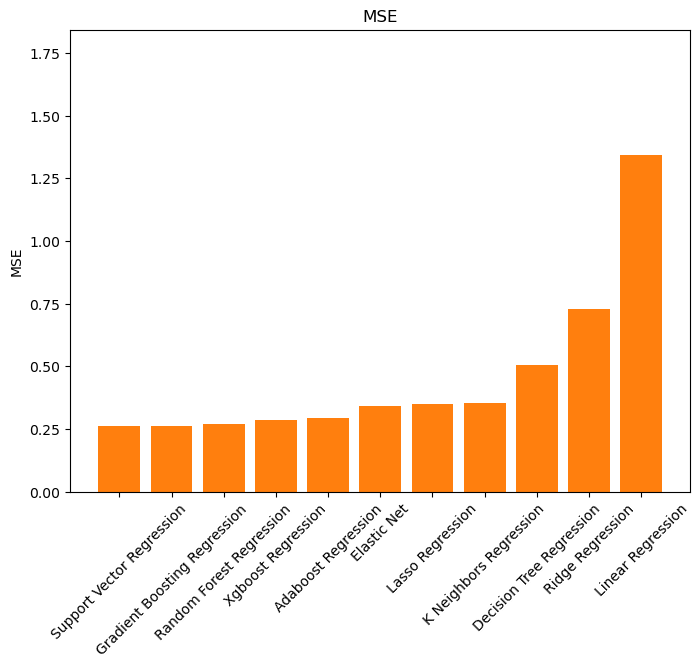

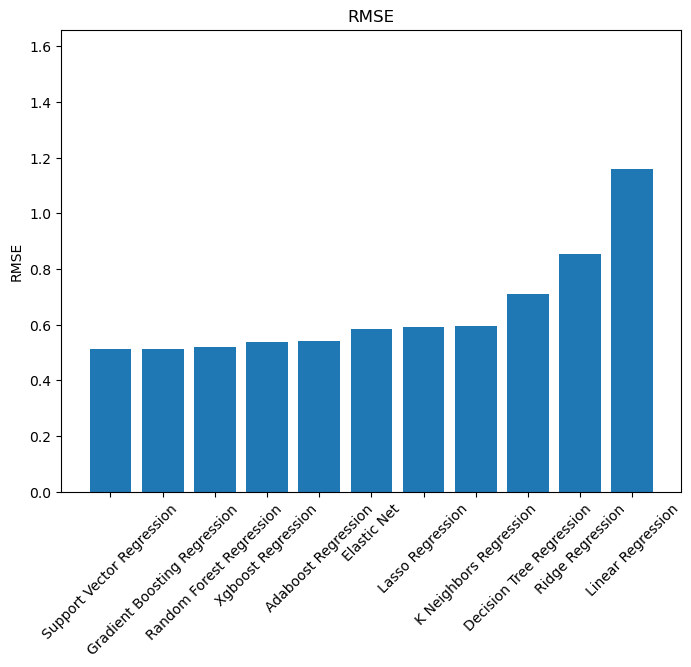

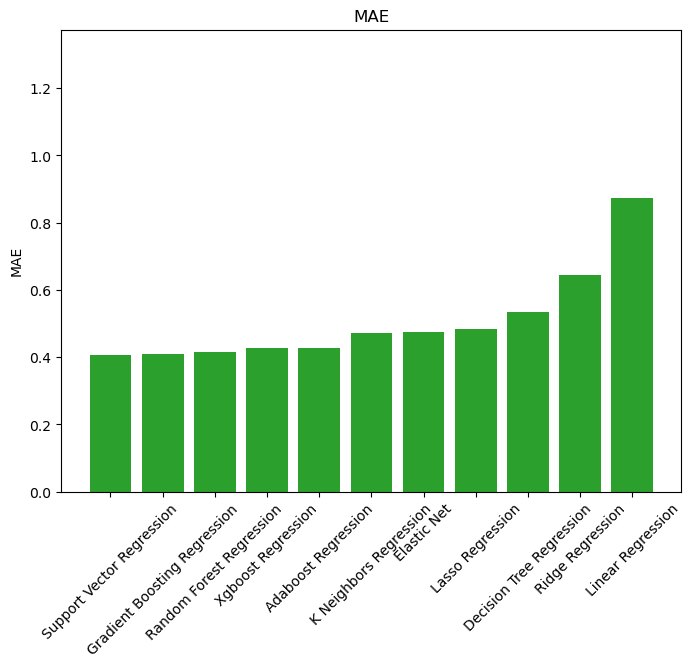

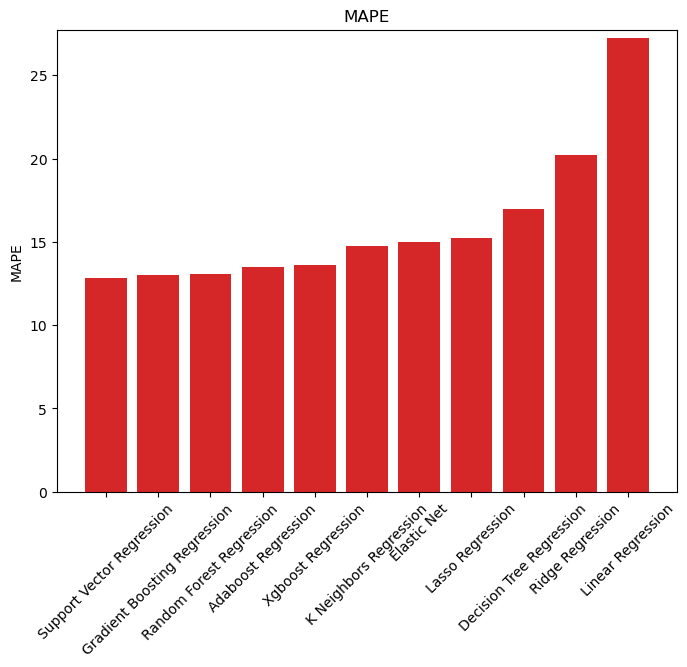

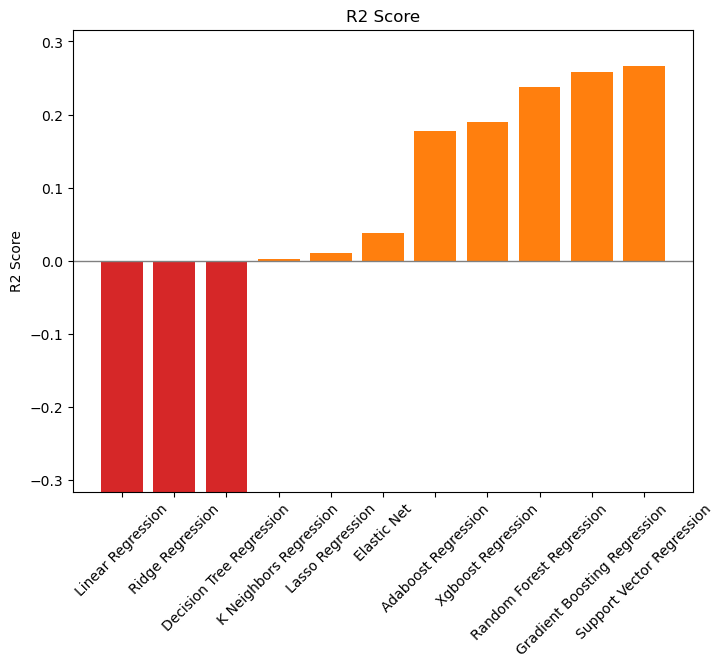

In [148]:
# Define the x axis labels
labels = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the color for each metric
colors = ["#ff7f0e", "#1f77b4", "#2ca02c", "#d62728", "#9467bd"]

# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Plot each model for a single metric
for i, metric_name in enumerate(metric_names):
    # Get the metric values and corresponding model names
    values = metrics_list[i]
    sorted_indices = np.argsort(values)
    sorted_values = [values[j] for j in sorted_indices]
    sorted_labels = [labels[j] for j in sorted_indices]
    
    if metric_name == "R2 Score":
        # Define the colors for positive and negative bars
        pos_color = colors[0]
        neg_color = colors[3]
        
        # Split the sorted values into positive and negative lists
        pos_values = [val if val > 0 else 0 for val in sorted_values]
        neg_values = [val if val < 0 else 0 for val in sorted_values]
        
        # Create the figure and axes for the diverging bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        
        # Plot the positive bars first
        ax.bar(sorted_labels, pos_values, color=pos_color)
        
        # Plot the negative bars on top of the positive bars
        ax.bar(sorted_labels, neg_values, color=neg_color)
        
        # Set the y limits based on the maximum absolute value of the metric
        y_limit = max(sorted_values) + 0.05
        ax.set_ylim([-y_limit, y_limit])

        # Set the title, labels, and ticks for the plot
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.axhline(y=0, color='gray', linewidth=1) # Add a horizontal line at y=0
        plt.xticks(rotation=45)

        # Display the plot
        plt.show()
    
    else:
        # For the other metrics, create a regular bar plot
        fig, ax = plt.subplots(figsize=(8,6))
        ax.bar(sorted_labels, sorted_values, color=colors[i])
        ax.set_title(metric_name)
        ax.set_ylabel(metric_name)
        ax.set_ylim([0, max(sorted_values)+0.5])
        plt.xticks(rotation=45)
        plt.show()

In [149]:
# Define the metric names and their corresponding values
metric_names = ["MSE", "RMSE", "MAE", "MAPE", "R2 Score"]
metrics_list = [[mse_linear_reg, mse_lasso, mse_ridge, mse_elastic_net, mse_decision_tree,
                mse_random_forest, mse_gradient_boosting, mse_adaboost, mse_k_neighbors,
                mse_svr, mse_xgboost],
               [rmse_linear_reg, rmse_lasso, rmse_ridge, rmse_elastic_net, rmse_decision_tree,
                rmse_random_forest, rmse_gradient_boosting, rmse_adaboost, rmse_k_neighbors,
                rmse_svr, rmse_xgboost],
               [mae_linear_reg, mae_lasso, mae_ridge, mae_elastic_net, mae_decision_tree,
                mae_random_forest, mae_gradient_boosting, mae_adaboost, mae_k_neighbors,
                mae_svr, mae_xgboost],
               [mape_linear_reg, mape_lasso, mape_ridge, mape_elastic_net, mape_decision_tree,
                mape_random_forest, mape_gradient_boosting, mape_adaboost, mape_k_neighbors,
                mape_svr, mape_xgboost],
               [r2_linear_reg, r2_lasso, r2_ridge, r2_elastic_net, r2_decision_tree,
                r2_random_forest, r2_gradient_boosting, r2_adaboost, r2_k_neighbors,
                r2_svr, r2_xgboost]]

# Define the ML model names
model_names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net",
          "Decision Tree Regression", "Random Forest Regression", "Gradient Boosting Regression",
          "Adaboost Regression", "K Neighbors Regression", "Support Vector Regression", "Xgboost Regression"]

# Define the green color format for highlighting the lowest value
lowest_value_format = '\033[32m{:.3f}\033[0m'

# Define the red color format for highlighting the highest value
highest_value_format = '\033[31m{:.3f}\033[0m'

# Create a PrettyTable object with the metric names as column headers
table = PrettyTable(["Model"] + metric_names)

# Add the metric values for each model as rows to the table
for i, model_name in enumerate(model_names):
    row = [model_name]
    for j in range(len(metric_names)):
        value = metrics_list[j][i]
        
        # Format the value with three decimal places
        value_formatted = f"{value:.3f}"
        
        # Highlight the lowest and highest value
        if j != 4:
            if value == min(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
        else:
            if value == min(metrics_list[j]):
                value_formatted = highest_value_format.format(value)
            elif value == max(metrics_list[j]):
                value_formatted = lowest_value_format.format(value)
                
        row.append(value_formatted)
        
    table.add_row(row)

# Print the formatted table
print(table.get_string())


+------------------------------+-------+-------+-------+--------+----------+
|            Model             |  MSE  |  RMSE |  MAE  |  MAPE  | R2 Score |
+------------------------------+-------+-------+-------+--------+----------+
|      Linear Regression       | 1.343 | 1.159 | 0.874 | 27.235 |  -2.780  |
|       Lasso Regression       | 0.351 | 0.593 | 0.483 | 15.255 |  0.011   |
|       Ridge Regression       | 0.731 | 0.855 | 0.645 | 20.222 |  -1.056  |
|         Elastic Net          | 0.342 | 0.585 | 0.474 | 14.990 |  0.038   |
|   Decision Tree Regression   | 0.504 | 0.710 | 0.535 | 16.985 |  -0.420  |
|   Random Forest Regression   | 0.271 | 0.521 | 0.414 | 13.095 |  0.237   |
| Gradient Boosting Regression | 0.264 | 0.513 | 0.409 | 13.012 |  0.258   |
|     Adaboost Regression      | 0.292 | 0.541 | 0.428 | 13.476 |  0.177   |
|    K Neighbors Regression    | 0.355 | 0.596 | 0.472 | 14.771 |  0.002   |
|  Support Vector Regression   | 0.261 | 0.511 | 0.407 | 12.825 |  0.266   |